# Facebook Ads Data Analysis

#### [Dataset download](https://www.kaggle.com/datasets/mrmorj/political-advertisements-from-facebook)

#### About Dataset

This database, updated daily, contains ads that ran on Facebook and were submitted by thousands of ProPublica users from around the world. We asked our readers to install browser extensions that automatically collected advertisements on their Facebook pages and sent them to our servers. We then used a machine learning classifier to identify which ads were likely political and included them in this dataset.

##### Features of the dataset 
- Ad ID: A unique identifier for each Facebook ad post.
- HTML: The HTML content of the ad post, which includes images and text.
- Political: A binary indicator (0 or 1) that denotes whether the ad is political or not.
- Not Political: A binary indicator (0 or 1) that denotes whether the ad is not political.
- Title: The title or headline of the ad post.
- Message: The main text content of the ad post.
- Thumbnail: The URL or link to a thumbnail image associated with the ad post.
- Created at: The date and time when the ad post was created (in UTC).
- Updated at: The date and time when the ad post was last updated (in UTC).
- Language: The language of the ad post.
- Images: The URL or link to the main image associated with the ad post.
- Impressions: The number of times the ad post was displayed to users.
- Political Probability: The probability that the ad post is political.
- Targeting: Information about the specific audience targeting for the ad post.
- Suppressed: A binary indicator (0 or 1) that denotes whether the ad post was suppressed.
- Targets: Information about the specific targets of the ad post.
- Advertiser: The name or entity that placed the ad post.
- Entities: Any labeled entities mentioned in the ad post (e.g., organizations, people).
- Page: The Facebook page associated with the ad post.
- Lower Page: The lower case version of the Facebook page associated with the ad post.
- Targetings: Additional information about the targeting of the ad post.
- Paid for by: The entity or organization that paid for the ad post.
- Targetedness: A measure of how targeted the ad post is.
- Listbuilding Fundraising Probability: Probability indicating if the ad post is related to listbuilding fundraising.

### Descriptive statistics:
- Summary:
This dataset contains ads that ran on Facebook which ads were likely political.
Dataset has 24 columns

| Column Name | Type | Comment |
| :- | :- | :- |
| id | str | post id number on facebook 
| html | str | HTML of the ad as collected by the Political Ad Collector 
| political | int | number of Political Ad Collector users who have voted that the ad is political 
| not_political | int | number of Political Ad Collector users who have voted that the ad is not political 
| title | float, str | ad title 
| message | str | ad content
| thumbnail | str | link for a thumbnail of the profile image (of the advertiser) 
| created_at | str | date ad was first collected by the Political Ad Collector 
| updated_at | str | the most recent time that it got an impression OR the most recent time it was voted on 
| lang | str | language of the ad. always en-US
| images | str | link for images included in the ad 
| impressions | int | number of times the ad has been seen by the Political Ad Collector 
| political_probability | float | calculated by the classifier. data only includes ads with a probability >=0.7 
| targeting | float, str | Facebook’s “Why am I seeing this?” disclosure provided to Political Ad Collector users 
| suppressed | str | value is false. suppressed ads are excluded from this data set because they were misclassified 
| targets | float, str | a parsed version of targeting
| advertiser | float, str | the account that posted the ad
| entities | float, str | named entities mentioned in the ad, extracted using software 
| page | float, str | the page that posted the ad 
| lower_page | float, str | the Facebook URL of the advertiser that posted the ad (the “page” column, lowercased) 
| targetings | float, str | an array of one or more of Facebook’s “Why am I seeing this?” disclosures provided to Political Ad Collector users
| paid_for_by | float, str | for political ads, the entity listed in Facebook’s required disclosure as having paid for the ad 
| targetedness | float, str | an internal metric for estimating how granularly an ad is targeted 
| listbuilding_fundraising_proba | float | Unique identifier 

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter
from sklearn.preprocessing import MinMaxScaler
from wordcloud import WordCloud

In [2]:
# read the dataset
df = pd.read_csv("fbpac-ads-en-US.csv")

# how the data look like
df.head()

,id,html,political,not_political,title,message,thumbnail,created_at,updated_at,lang,...,suppressed,targets,advertiser,entities,page,lower_page,targetings,paid_for_by,targetedness,listbuilding_fundraising_proba
0,hyperfeed_story_id_5c9baa3ee0ec08073500042,"<div class=""_5pa- userContentWrapper""><div cla...",0,0,League of Conservation Voters,<p>BREAKING: Trump’s Department of the Interio...,https://pp-facebook-ads.s3.amazonaws.com/v/t1....,2019-03-27 16:52:25.625455+00,2019-03-27 16:52:25.625455+00,en-US,...,f,[],NaN,"[{""entity"": ""Endangered Species Act"", ""entity_...",https://www.facebook.com/LCVoters/,https://www.facebook.com/lcvoters/,NaN,League of Conservation Voters,NaN,0.647945
1,hyperfeed_story_id_5c9bb2a2413852086735771,"<div class=""_5pa- userContentWrapper""><div cla...",0,0,Indivisible Guide,<p>The Mueller investigation is over. Special ...,https://pp-facebook-ads.s3.amazonaws.com/v/t1....,2019-03-27 17:28:14.096849+00,2019-03-27 17:28:14.096849+00,en-US,...,f,[],NaN,"[{""entity"": ""Americans"", ""entity_type"": ""Group...",https://www.facebook.com/indivisibleguide/,https://www.facebook.com/indivisibleguide/,NaN,Indivisible Project,NaN,0.350635
2,hyperfeed_story_id_5c9bb4fa461731e29426627,"<div class=""_5pa- userContentWrapper""><div cla...",0,0,International Rescue Committee,<p>Zimbabwe is reeling from the impact of Cycl...,https://pp-facebook-ads.s3.amazonaws.com/v/t1....,2019-03-27 17:38:23.101377+00,2019-03-27 17:38:23.101377+00,en-US,...,f,[],NaN,"[{""entity"": ""Zimbabwe"", ""entity_type"": ""Region""}]",https://www.facebook.com/InternationalRescueCo...,https://www.facebook.com/internationalrescueco...,NaN,International Rescue Committee,NaN,0.999909
3,23843380741530360,"<div class=""_5pcr userContentWrapper""><div cla...",0,0,Covenant House International,<p>What more can you do in the final hours of ...,https://pp-facebook-ads.s3.amazonaws.com/v/t1....,2018-12-30 20:59:13.879124+00,2018-12-30 20:59:13.879124+00,en-US,...,f,"[{""target"": ""Activity on the Facebook Family""}...",Covenant House International,[],https://www.facebook.com/CovenantHouse/,https://www.facebook.com/covenanthouse/,"{""<div><div class=\""_4-i0 _26c5\""><div class=\...",Covenant House International,5.0,NaN
4,hyperfeed_story_id_5c9bb059454851c17741213,"<div class=""_5pa- userContentWrapper""><div cla...",0,1,Planned Parenthood,"<p>Say it loud, say it proud: Our rights, our ...",https://pp-facebook-ads.s3.amazonaws.com/v/t1....,2019-03-27 17:18:29.764002+00,2019-04-11 15:02:58.081112+00,en-US,...,f,[],NaN,"[{""entity"": ""Planned Parenthood"", ""entity_type...",https://www.facebook.com/PlannedParenthood/,https://www.facebook.com/plannedparenthood/,NaN,Planned Parenthood Federation of America,NaN,0.999977


In [3]:
df.info()
print("""
There are 6 columns having int64 and float64 Dtype which are 'political', 'not_political', 'impressions','political_probability','targetedness' and 'listbuilding_fundraising_proba'
""")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162324 entries, 0 to 162323
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              162324 non-null  object 
 1   html                            162324 non-null  object 
 2   political                       162324 non-null  int64  
 3   not_political                   162324 non-null  int64  
 4   title                           162306 non-null  object 
 5   message                         162324 non-null  object 
 6   thumbnail                       162324 non-null  object 
 7   created_at                      162324 non-null  object 
 8   updated_at                      162324 non-null  object 
 9   lang                            162324 non-null  object 
 10  images                          162324 non-null  object 
 11  impressions                     162324 non-null  int64  
 12  political_probab

In [4]:
df.shape

(162324, 24)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
political,162324.0,4.177663,10.574403,0.000000,0.000000,1.000000,4.000000,488.000000
not_political,162324.0,0.794214,2.770883,0.000000,0.000000,0.000000,1.000000,330.000000
impressions,162324.0,4.605049,40.689815,0.000000,1.000000,1.000000,2.000000,3575.000000
political_probability,162324.0,0.928099,0.169513,0.000079,0.951812,0.997825,0.999978,1.000000
targetedness,112747.0,3.939723,1.758957,0.000000,3.000000,4.000000,4.000000,12.000000
listbuilding_fundraising_proba,152394.0,0.545964,0.333821,0.000091,0.265190,0.423612,0.999893,1.230622


In [6]:
# only numeric data
numeric_cols = ['political', 'not_political', 'impressions','political_probability','targetedness', 'listbuilding_fundraising_proba']
num_data = df[numeric_cols]

In [7]:
# calculate percentage of null data to decide - fill nan or drop?
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values = missing_values/len(df)*100
check_missing_values = pd.concat([missing_values, percentage_missing_values], axis = 1, keys= ['Missing values', '% Missing'])
print(check_missing_values)

                                Missing values  % Missing
paid_for_by                              50279  30.974471
targetedness                             49577  30.542002
targetings                               48262  29.731894
targeting                                46258  28.497326
advertiser                               37711  23.231931
listbuilding_fundraising_proba            9930   6.117395
targets                                   4207   2.591730
entities                                  3666   2.258446
lower_page                                2560   1.577093
page                                      2560   1.577093
title                                       18   0.011089
suppressed                                   0   0.000000
id                                           0   0.000000
html                                         0   0.000000
impressions                                  0   0.000000
images                                       0   0.000000
lang          

In [8]:
# drop the rows having null values more than 5% and fillna for less than 5%
filtered_per_data = check_missing_values.T.loc[:, numeric_cols]
filtered_per_data.T.sort_values(by='% Missing', ascending = False)

,Missing values,% Missing
targetedness,49577.0,30.542002
listbuilding_fundraising_proba,9930.0,6.117395
political,0.0,0.000000
not_political,0.0,0.000000
impressions,0.0,0.000000
political_probability,0.0,0.000000


In [9]:
# both numeric columns have missing percentage more than %5
# so drop nan
cleaned_df = df.dropna(axis=0)
cleaned_df.head()

,id,html,political,not_political,title,message,thumbnail,created_at,updated_at,lang,...,suppressed,targets,advertiser,entities,page,lower_page,targetings,paid_for_by,targetedness,listbuilding_fundraising_proba
20,23843267430160083,"<div class=""_5pcr userContentWrapper""><div cla...",0,0,BOLD PAC,<p>Donald Trump HATES anybody that tells the t...,https://pp-facebook-ads.s3.amazonaws.com/v/t1....,2019-03-27 17:12:16.907954+00,2019-03-27 17:12:16.907954+00,en-US,...,f,"[{""target"": ""Retargeting"", ""segment"": ""people ...",BOLD PAC,"[{""entity"": ""Americans"", ""entity_type"": ""Group...",https://www.facebook.com/boldpac/,https://www.facebook.com/boldpac/,"{""<div><div class=\""_4-i0 _26c5\""><div class=\...",CHC BOLD PAC,3.0,0.263401
23,23843047113450081,"<div class=""_5pcr userContentWrapper""><div cla...",0,0,Secure Financial Advisory Group,"<div class=""mbs _6m6 _2cnj _5s6c""><a href=""htt...",https://pp-facebook-ads.s3.amazonaws.com/v/t1....,2018-10-29 00:49:48.487444+00,2018-10-30 18:58:22.182822+00,en-US,...,f,"[{""target"": ""Age"", ""segment"": ""59 and older""},...",Secure Financial Advisory Group,[],https://www.facebook.com/Secure-Financial-Advi...,https://www.facebook.com/secure-financial-advi...,"{""<div><div class=\""_4-i0 _26c5\""><div class=\...",Secure Financial Advisory Group,2.0,0.213583
32,23842930886360741,"<div class=""_5pcr userContentWrapper _3ccb _5p...",4,1,Great Public Schools for US,"<div class=""mbs _5pbx"" id=""js_26"">We're fighti...",https://pp-facebook-ads.s3.amazonaws.com/v/t1....,2018-11-29 06:23:22.075256+00,2019-01-02 21:20:22.33447+00,en-US,...,f,"[{""target"": ""Age"", ""segment"": ""18 and older""},...",Great Public Schools for US,[],https://www.facebook.com/GreatPublicSchoolsforUS/,https://www.facebook.com/greatpublicschoolsforus/,"{""<div><div class=\""_4-i0 _26c5\""><div class=\...",Great Public Schools for US,4.0,0.424885
38,6097228149803,"<div class=""_5pcr userContentWrapper""><div cla...",4,1,The Christian Left,<p>Human Rights Are Not Optional</p><p> Availa...,https://pp-facebook-ads.s3.amazonaws.com/v/t1....,2018-09-13 20:49:05.093272+00,2018-09-14 09:36:47.814209+00,en-US,...,f,"[{""target"": ""Age"", ""segment"": ""18 and older""},...",The Christian Left,"[{""entity"": ""Men & Women's"", ""entity_type"": ""O...",https://www.facebook.com/TheChristianLeft/,https://www.facebook.com/thechristianleft/,"{""<div><div class=\""_4-i0 _26c5\""><div class=\...",The Christian Left,2.0,0.270559
43,23843002205740746,"<div class=""_5pcr userContentWrapper""><div cla...",5,0,Angie Craig,<p>NEW POLL: Our opponent just released a poll...,https://pp-facebook-ads.s3.amazonaws.com/v/t1....,2018-09-13 20:44:50.468177+00,2018-09-13 22:23:49.068212+00,en-US,...,f,"[{""target"": ""Age"", ""segment"": ""18 and older""},...",Angie Craig,"[{""entity"": ""House"", ""entity_type"": ""Organizat...",https://www.facebook.com/AngieCraigforCongress/,https://www.facebook.com/angiecraigforcongress/,"{""<div><div class=\""_4-i0 _26c5\""><div class=\...",Angie Craig for Congress,4.0,1.000029


In [10]:
cleaned_df.shape

(68641, 24)

### Plot the data distribution

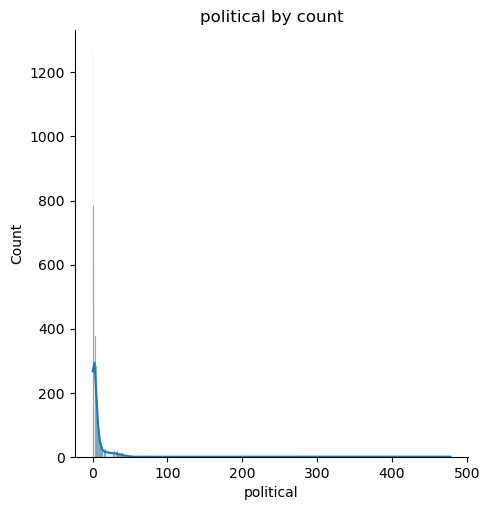

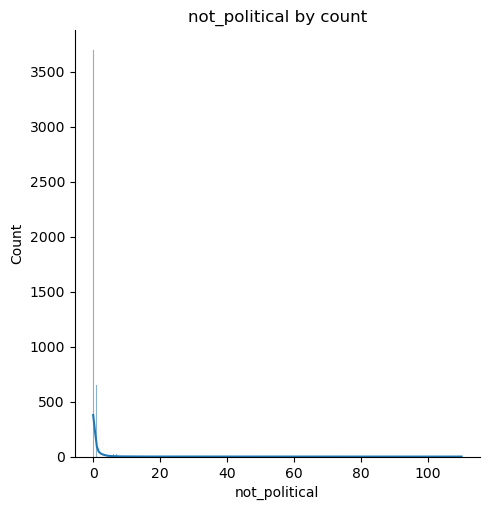

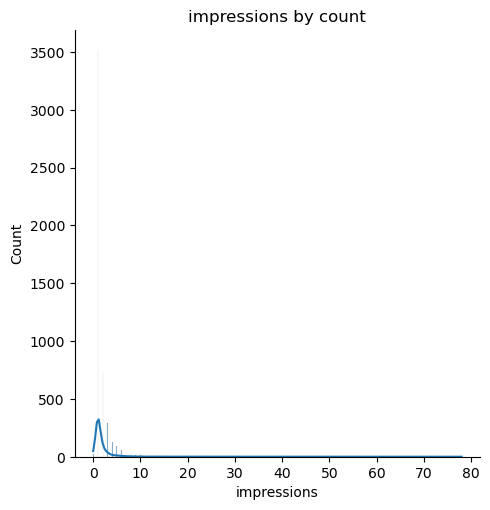

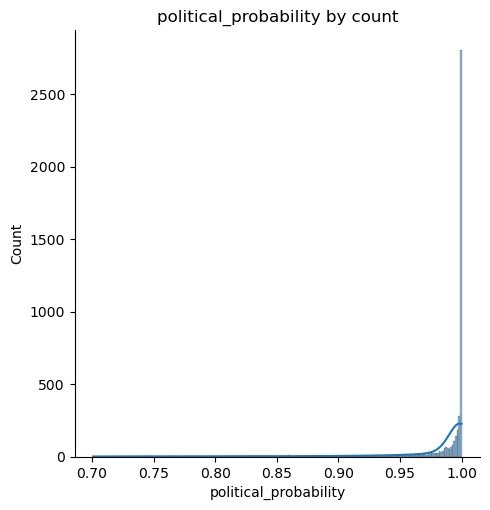

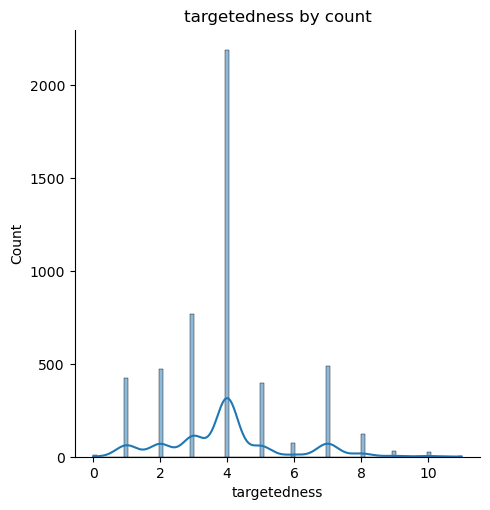

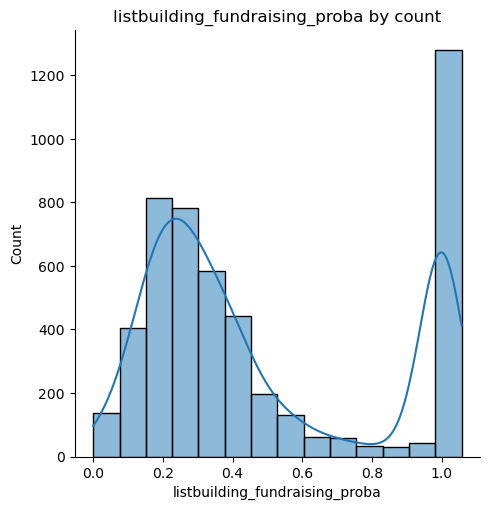

In [11]:
# plot for 'political' ads
for col in numeric_cols:
    p = sns.displot(cleaned_df[:5000], x=col, kde=True)
    plt.title(col + " by count")

- Most of the ad collectors did not voted for whether the ad is political or not political
- Also there is no uniform distrbution of data ( not normally distributed data)

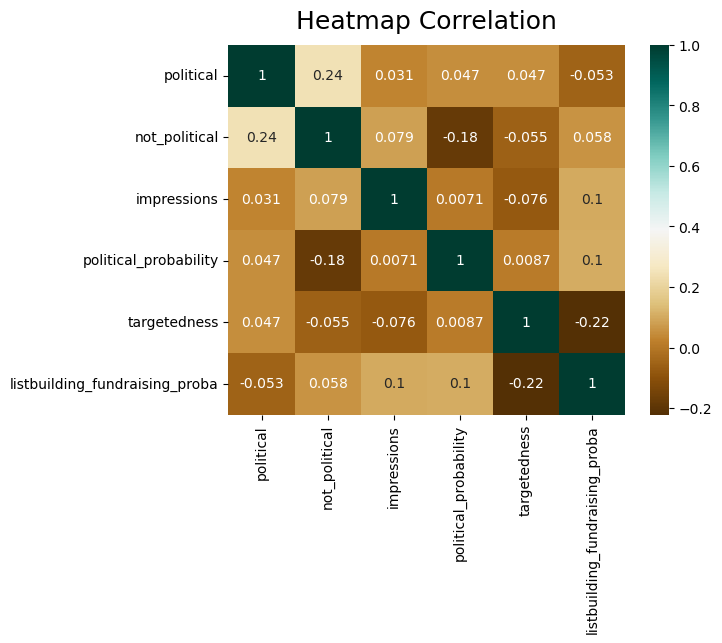

In [12]:
# heat map to check the correlation between numeric columns
heatmap_check = sns.heatmap(cleaned_df.corr(),annot=True, cmap = "BrBG")
heatmap_check.set_title("Heatmap Correlation", fontdict = {"fontsize":18}, pad = 12)
plt.show()

- There is no co-relation between the columns

- Exploratory Data Analysis

In [13]:
# identify the variables and their types
# new_df.dtypes
types = {i: set(map(type, df[i])) for i in df.columns} 
print(df.info())
types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162324 entries, 0 to 162323
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              162324 non-null  object 
 1   html                            162324 non-null  object 
 2   political                       162324 non-null  int64  
 3   not_political                   162324 non-null  int64  
 4   title                           162306 non-null  object 
 5   message                         162324 non-null  object 
 6   thumbnail                       162324 non-null  object 
 7   created_at                      162324 non-null  object 
 8   updated_at                      162324 non-null  object 
 9   lang                            162324 non-null  object 
 10  images                          162324 non-null  object 
 11  impressions                     162324 non-null  int64  
 12  political_probab

{'id': {str},
 'html': {str},
 'political': {int},
 'not_political': {int},
 'title': {float, str},
 'message': {str},
 'thumbnail': {str},
 'created_at': {str},
 'updated_at': {str},
 'lang': {str},
 'images': {str},
 'impressions': {int},
 'political_probability': {float},
 'targeting': {float, str},
 'suppressed': {str},
 'targets': {float, str},
 'advertiser': {float, str},
 'entities': {float, str},
 'page': {float, str},
 'lower_page': {float, str},
 'targetings': {float, str},
 'paid_for_by': {float, str},
 'targetedness': {float},
 'listbuilding_fundraising_proba': {float}}

In [14]:
def shorten_column_names(df, max_length=10):
    '''
    Shortens long column names of the provided DataFrame for visualization purposes.
       
    Parameters:
        df (pandas.DataFrame): Input DataFrame.
        max_length (int): Maximum length of column names. Default is 10.
       
    Returns:
        pandas.DataFrame: DataFrame with shortened column names.
    '''
    df_shortened = df.copy()
    df_shortened.columns = [col[:max_length - 3] + '...' if len(col) > max_length else col for col in df_shortened.columns]
    return df_shortened



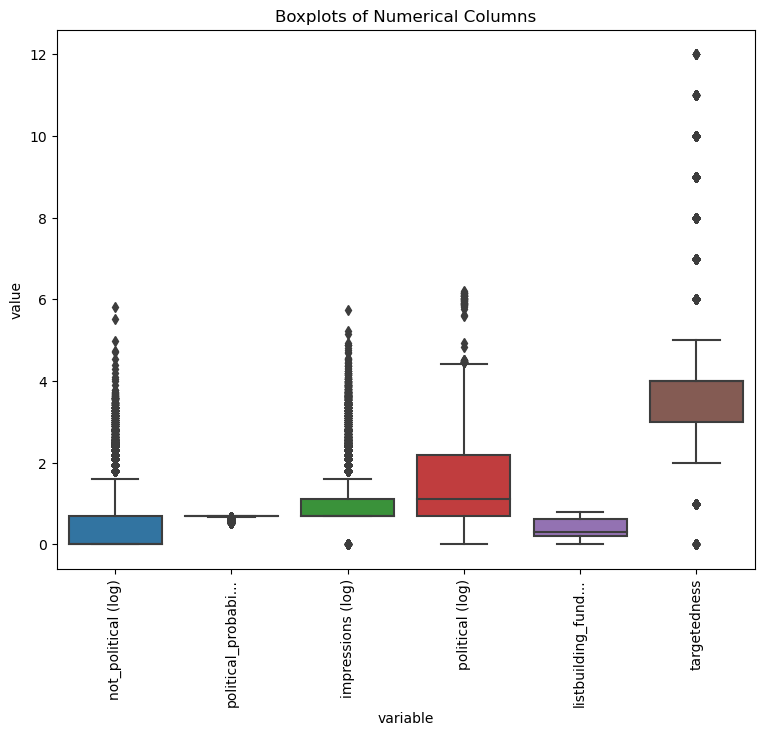

                                Lower Bound  Upper Bound
political                         -9.500000    18.500000
not_political                     -1.500000     2.500000
impressions                       -0.500000     3.500000
political_probability              0.961115     1.023306
targetedness                       1.500000     5.500000
listbuilding_fundraising_proba    -0.733350     1.809248


Int64Index([    20,     23,     32,     38,     43,     60,     64,     67,
                68,     75,
            ...
            162309, 162310, 162312, 162314, 162316, 162317, 162319, 162320,
            162321, 162323],
           dtype='int64', length=68641)

In [15]:
# Clean your data (error, remove duplicates, missing values, Outliers)
num_clean_df = cleaned_df[numeric_cols]

observations = {
    'political': "Most ads have zero ratings;\nExponential drop-off;\nFairly long tail: some ads\nhave high rating counts",
    'not_political': "Most ads have zero ratings;\nMuch shorter tail",
    'impressions': "Most ads have a single\nimpression",
    'political_probability': "Most ads are classified as\nhaving a high probability\nof being political;\nThis is due to how the\ndataset was constructed",
    'targetedness': "Targetedness is most often 4;\nWe lack info about\nwhat this means",
    'listbuilding_fundraising_proba': "Bimodal distribution;\nUnclear what this column\nrepresents"
}

# Visualization
num_cols = cleaned_df.select_dtypes(include=['number']).columns
num_cols_without_targetedness = list(set(num_cols) - set(['targetedness']))
df_transformed = cleaned_df[num_cols_without_targetedness].apply(np.log1p)
df_transformed['targetedness'] = cleaned_df['targetedness']
df_transformed.rename(columns={col: col + ' (log)' for col in num_cols_without_targetedness}, inplace=True)

fig, ax = plt.subplots(figsize=(9, 7))
sns.boxplot(x="variable", y="value", data=pd.melt(shorten_column_names(df_transformed, 20)), ax=ax)
ax.set_title("Boxplots of Numerical Columns")
ax.set_xticklabels(ax.get_xticklabels(), rotation='vertical')

if 'boxplots' in observations:
    ax.text(0.5, 0.5, observations['boxplots'].replace(";", ";\n"), ha='left', va='center', wrap=True)
    ax.axis('off')

plt.xticks(rotation='vertical')
plt.show()

# Outlier detection
Q1_ = num_clean_df.quantile(0.25)
Q3_ = num_clean_df.quantile(0.75)
IQR_ = Q3_ - Q1_

lower_bound = Q1_ - 1.5 * IQR_
upper_bound = Q3_ + 1.5 * IQR_

outliers = num_clean_df[(num_clean_df < lower_bound) | (num_clean_df > upper_bound)]

print(pd.concat([lower_bound, upper_bound], axis=1, keys= ['Lower Bound', 'Upper Bound']))

outliers.index


In [16]:
# Transformation (Standardization, Normalization, encoding categorical to numerical)
scaler = MinMaxScaler()
d = scaler.fit_transform(num_clean_df)
scaled_df = pd.DataFrame(d, columns=num_clean_df.columns)
scaled_df

,political,not_political,impressions,political_probability,targetedness,listbuilding_fundraising_proba
0,0.000000,0.00000,0.003195,0.998018,0.250000,0.213981
1,0.000000,0.00000,0.015974,0.960857,0.166667,0.173496
2,0.008197,0.00303,0.009585,0.934768,0.333333,0.345212
3,0.008197,0.00303,0.006390,0.589935,0.166667,0.219798
4,0.010246,0.00000,0.003195,0.999998,0.333333,0.812607
...,...,...,...,...,...,...
68636,0.000000,0.00000,0.003195,0.992839,0.583333,0.270320
68637,0.024590,0.00000,0.003195,0.999875,0.583333,0.094979
68638,0.000000,0.00000,0.003195,0.999908,0.333333,0.253810
68639,0.000000,0.00000,0.003195,0.991003,0.333333,0.166699


In [17]:
# Data Visualization (use the suitable visualization that you need)

In [18]:
# Set up stopwords
stop = set(stopwords.words('english'))

def build_list(df, col="title"):
    corpus = []  # Initialize an empty list to store processed words
    lem = WordNetLemmatizer()  # Create a WordNetLemmatizer object
    stop = set(stopwords.words('english'))  # Set stopwords (redundant, can be removed)
    new = df[col].dropna().str.split()  # Split the text into a list of words
    new = new.values.tolist()  # Convert the column to a nested list

    # Iterate over the nested list, lemmatize words, and add to the corpus
    corpus = [lem.lemmatize(word.lower()) for i in new for word in i if word not in stop]

    return corpus  # Return the processed word list      

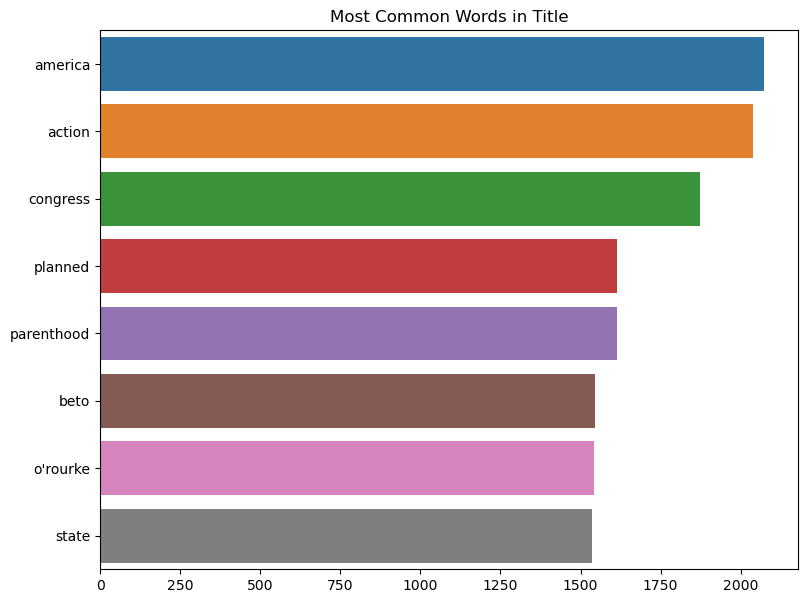

In [19]:
corpus = build_list(cleaned_df)  # Call build_list function with data as input and get the word list
counter = Counter(corpus)  # Create a Counter object to count word occurrences
most = counter.most_common()  # Get the most common words and their counts

x = []  # Initialize a list to store the words
y = []  # Initialize a list to store the counts

# Iterate over the most common words and their counts (first 10)
for word, count in most[:10]:
    if word not in stop:
        x.append(word)  # Add the word to the x list
        y.append(count)  # Add the count to the y list

# Create a bar plot of the most common words
plt.figure(figsize=(9, 7))  # Set the figure size
sns.barplot(x=y, y=x)  # Create the bar plot
plt.title("Most Common Words in Title")  # Set the plot title
plt.show()  # Display the plot

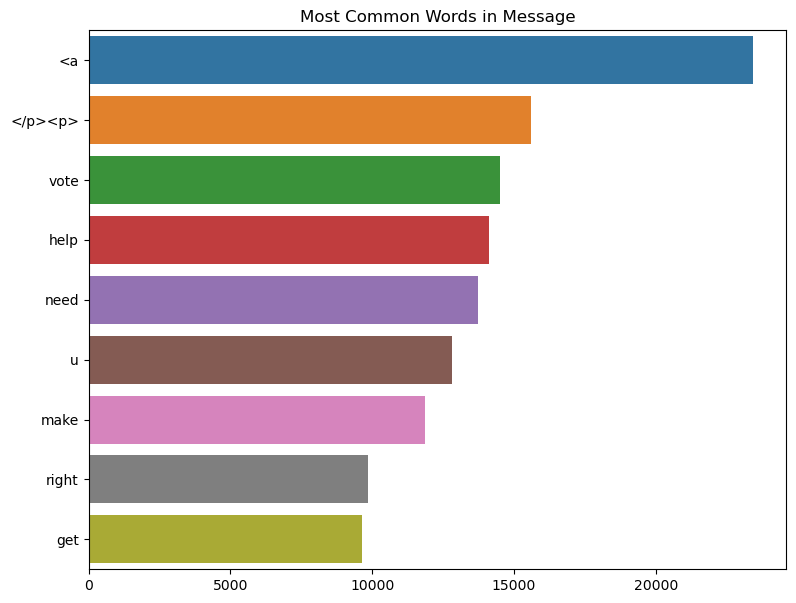

In [20]:
corpus = build_list(cleaned_df, "message")  # Call build_list function with data as input and get the word list
counter = Counter(corpus)  # Create a Counter object to count word occurrences
most = counter.most_common()  # Get the most common words and their counts

x = []  # Initialize a list to store the words
y = []  # Initialize a list to store the counts

# Iterate over the most common words and their counts (first 10)
for word, count in most[:10]:
    if word not in stop:
        x.append(word)  # Add the word to the x list
        y.append(count)  # Add the count to the y list

# Create a bar plot of the most common words
plt.figure(figsize=(9, 7))  # Set the figure size
sns.barplot(x=y, y=x)  # Create the bar plot
plt.title("Most Common Words in Message")  # Set the plot title
plt.show()  # Display the plot

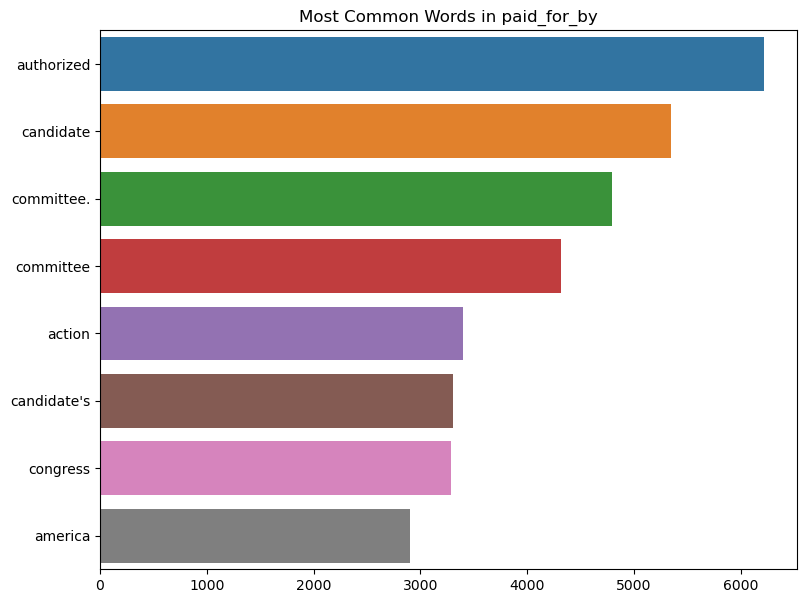

In [21]:
corpus = build_list(cleaned_df, "paid_for_by")  # Call build_list function with data as input and get the word list
counter = Counter(corpus)  # Create a Counter object to count word occurrences
most = counter.most_common()  # Get the most common words and their counts

x = []  # Initialize a list to store the words
y = []  # Initialize a list to store the counts

# Iterate over the most common words and their counts (first 10)
for word, count in most[:10]:
    if word not in stop:
        x.append(word)  # Add the word to the x list
        y.append(count)  # Add the count to the y list

# Create a bar plot of the most common words
plt.figure(figsize=(9, 7))  # Set the figure size
sns.barplot(x=y, y=x)  # Create the bar plot
plt.title("Most Common Words in paid_for_by")  # Set the plot title
plt.show()  # Display the plot

In [22]:
# Most ad poster?
# Top 15 ad poster
ad_posters = cleaned_df['advertiser'].value_counts().sort_values(ascending=False)[:15]
ad_posters

Beto O'Rourke                1540
Donald J. Trump              1134
MoveOn                        799
ACLU                          780
Planned Parenthood Action     759
Planned Parenthood            702
Penzeys Spices                685
Feeding America               521
Tom Steyer                    479
Ocean Conservancy             475
Andrew Janz                   466
Elizabeth Warren              453
Democratic Party              449
Sierra Club                   444
Care2                         426
Name: advertiser, dtype: int64

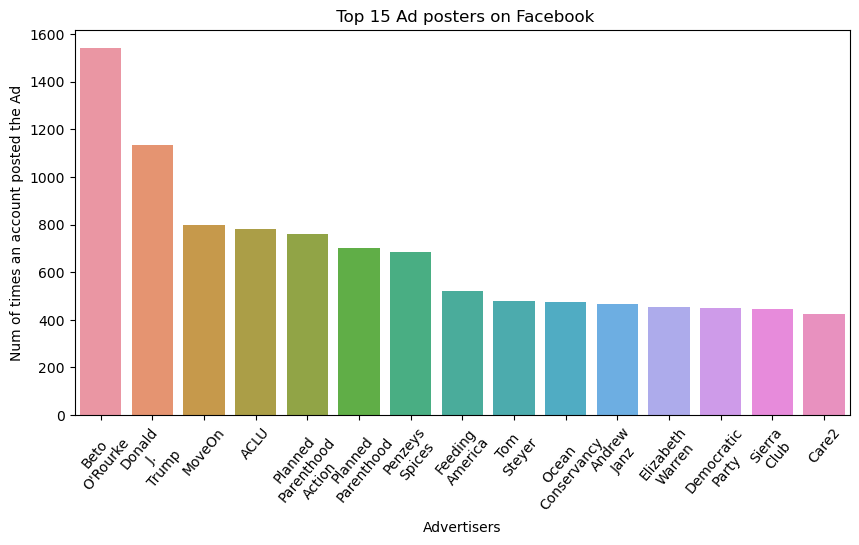

In [23]:
plt.figure(figsize=(10,5))
sns.barplot(x=ad_posters.index.str.replace(' ', '\n'),y=ad_posters.values)
plt.title(' Top 15 Ad posters on Facebook')
plt.ylabel('Num of times an account posted the Ad', fontsize=10)
plt.xlabel('Advertisers', fontsize=10)
plt.xticks(rotation=50)
plt.show()

Top Advertisers with Highest Number of Political Ads:
Beto O'Rourke                1268
Donald J. Trump               816
ACLU                          657
Planned Parenthood Action     617
Planned Parenthood            558
Name: advertiser, dtype: int64


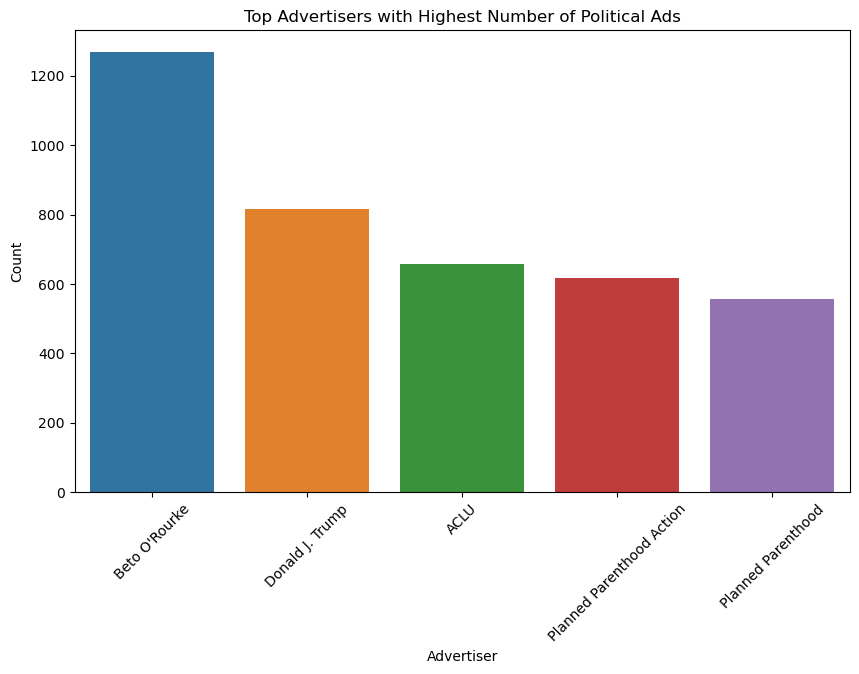

In [24]:
# Which advertisers have the highest number of political ads?
top_advertisers = cleaned_df[cleaned_df['political'] > 0]['advertiser'].value_counts().nlargest(5)
print("Top Advertisers with Highest Number of Political Ads:")
print(top_advertisers)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_advertisers.index, y=top_advertisers.values)
plt.title('Top Advertisers with Highest Number of Political Ads')
plt.xlabel('Advertiser')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

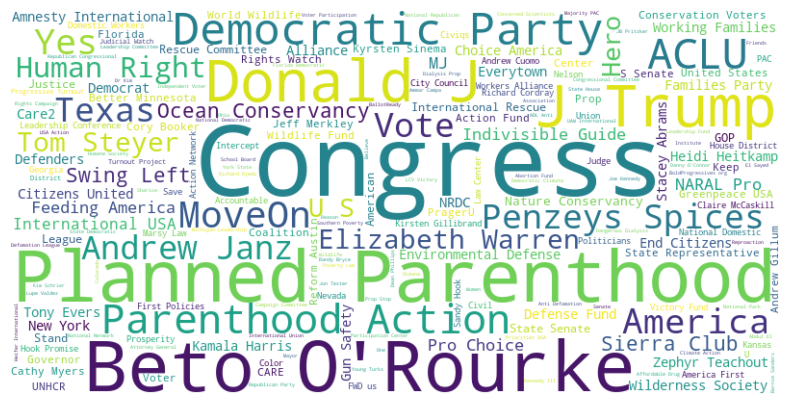

In [25]:
# Word cloud of common words in the title of political ads
political_ads = cleaned_df[cleaned_df['political'] > 0]

titles_text = ' '.join(political_ads['title'].astype(str))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(titles_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Analysis of "images"  column


In [26]:
# the number of images
image_count = cleaned_df['images'].str.count('{.*?}').sum()

print("Total number of images:", image_count)

Total number of images: 68641


In [28]:
# the image links from the "images" column
image_links = cleaned_df['images'].str.extract(r'\{(.*?)\}')

# the image links
for link in image_links[0].head(10):
    print(link)

https://pp-facebook-ads.s3.amazonaws.com/v/t45.1600-4/cp0/q90/spS444/c0.0.1200.629a/s526x296/53804656_23843234323890083_4685222653173170176_n.png.jpg
https://pp-facebook-ads.s3.amazonaws.com/v/t45.1600-4/cp0/q90/c1.0.1198.628/s526x296/44743993_23843047104120081_4831282447821832192_n.png.jpg
https://pp-facebook-ads.s3.amazonaws.com/v/t45.1600-4/p403x403/32009796_23842811023910741_8084171071562973184_n.png
https://pp-facebook-ads.s3.amazonaws.com/v/t1.0-9/41393481_2012697688752358_1091876228190699520_n.png
https://pp-facebook-ads.s3.amazonaws.com/v/t45.1600-4/cp0/q90/c0.0.1200.627/s552x414/41494107_23843001817280746_5357358281645883392_n.png.jpg
https://pp-facebook-ads.s3.amazonaws.com/v/t45.1600-4/cp0/q90/spS444/c1.0.1198.628a/s526x296/41962984_23842962205010413_1248607852633784320_n.png.jpg
https://pp-facebook-ads.s3.amazonaws.com/rsrc.php/v3/yU/r/fw6BHwKAlzM.png,https://pp-facebook-ads.s3.amazonaws.com/v/t45.1600-4/cp0/q90/c1.0.1198.628/s526x296/44390663_6127507230257_8585510230224273

### Displaying images

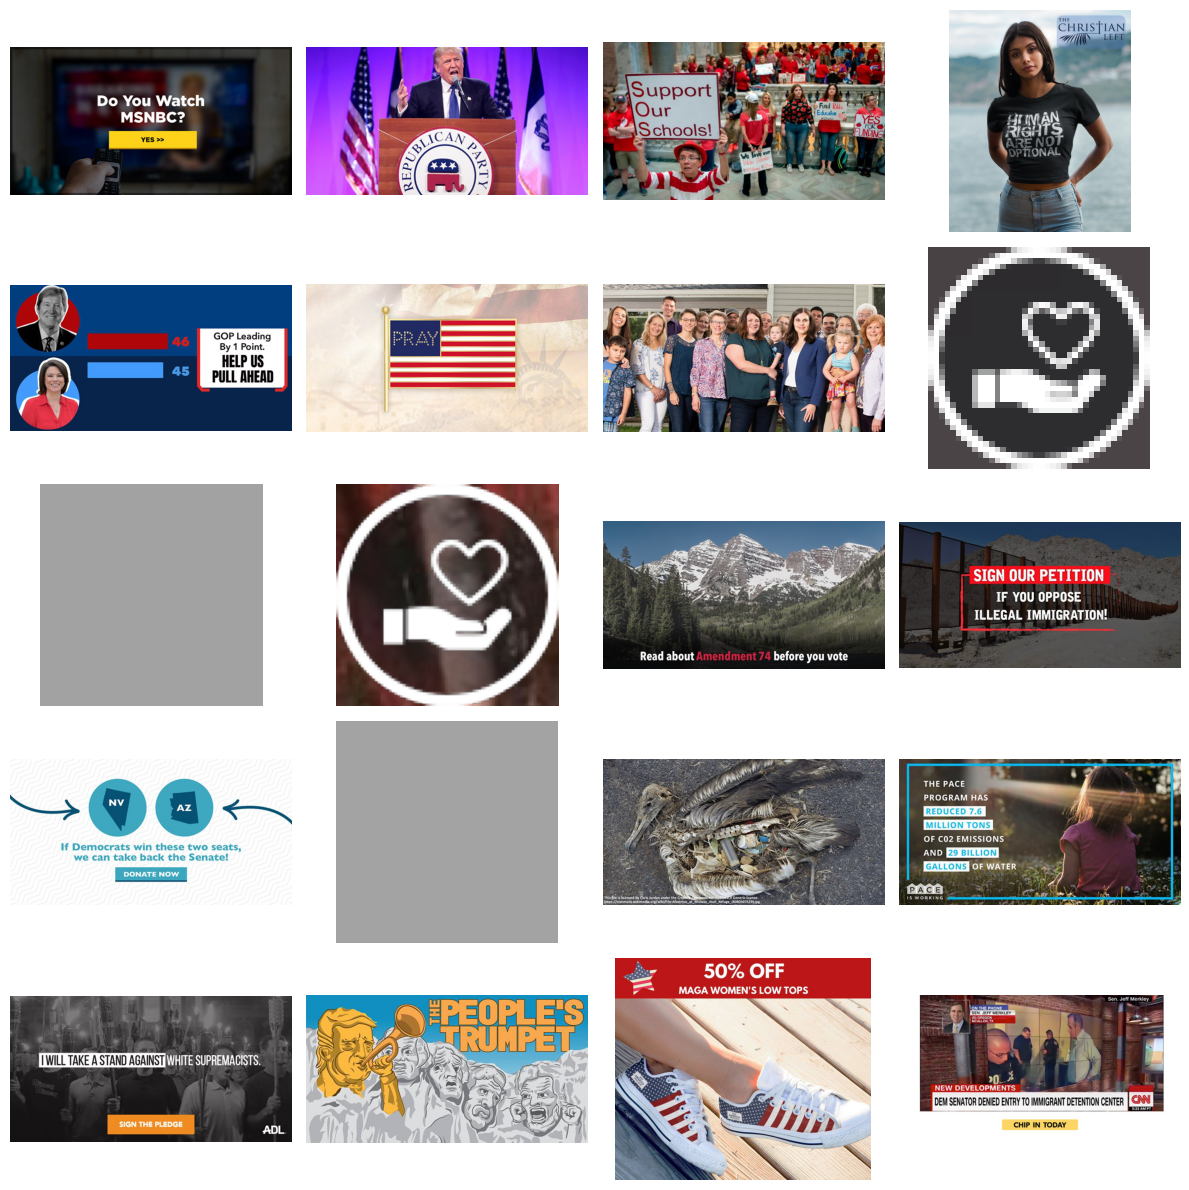

In [30]:
import requests
import matplotlib.pyplot as plt
from PIL import Image
import io
import re


# Extracting the image links from the "images" column
image_links = cleaned_df['images'].str.extractall(r'\{(.*?)\}')[0].tolist()[:24]

# Creating a subplot grid with 5 rows and 4 columns
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(12, 12))

# Loop through the image links and display the images
for i, links in enumerate(image_links):
    # Spliting the links if there are multiple separated by commas
    links = links.split(',')

    for link in links:
        link = link.strip()  # Removing any leading/trailing whitespace

        try:
            # Sending a request to download the image
            response = requests.get(link)

            # Opening the image using PIL
            img = Image.open(io.BytesIO(response.content))

            ax = axes[i // 4, i % 4]
            ax.imshow(img)
            ax.axis('off')

        except:
            # If there's an error in opening the image, continue to the next link
            continue


plt.tight_layout()
plt.show()

#### Plotting the number of political and non-political images

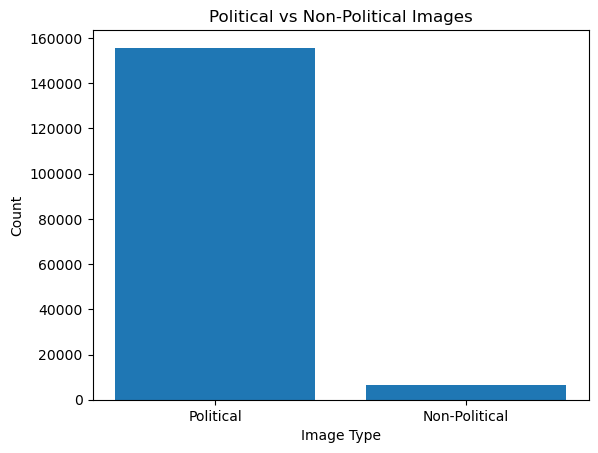

In [33]:
# the number of political and non-political images
political_count = df[df['political_probability'] >= 0.5]['political_probability'].count()
non_political_count = df[df['political_probability'] < 0.5]['political_probability'].count()

# a bar plot
labels = ['Political', 'Non-Political']
counts = [political_count, non_political_count]

plt.bar(labels, counts)

plt.xlabel('Image Type')
plt.ylabel('Count')
plt.title('Political vs Non-Political Images')

plt.show()

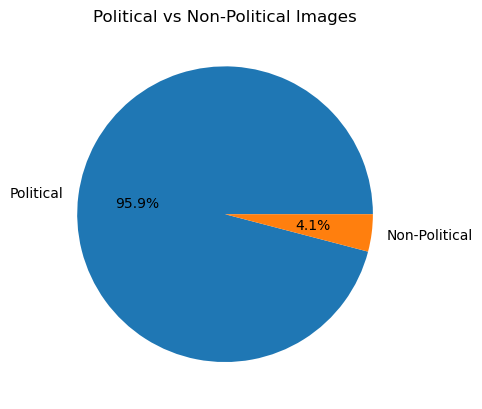

In [34]:
plt.pie(counts, labels=labels, autopct='%1.1f%%')
plt.title('Political vs Non-Political Images')

plt.show()

## Analysis of 'created_at' and 'updated_at' columns

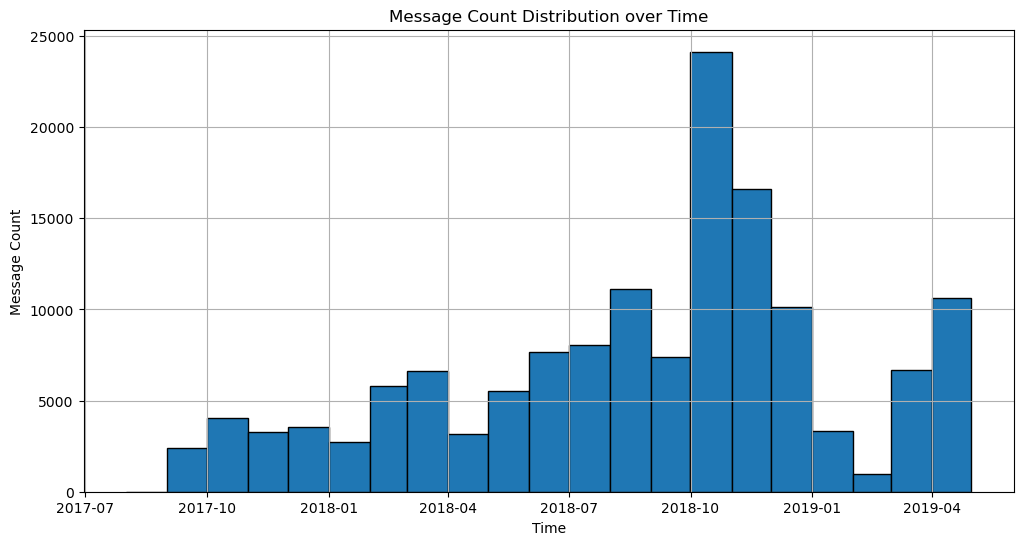

In [41]:
df['created_at'] = pd.to_datetime(df['created_at'])
df['updated_at'] = pd.to_datetime(df['updated_at'])

# Setting the figure size
plt.figure(figsize=(12, 6))

# Setting the time interval for the histogram
time_interval = '1M'

# Creating a histogram of message counts based on created_at column
df['created_at'].hist(bins=pd.date_range(start=df['created_at'].min(), end=df['created_at'].max(), freq=time_interval), edgecolor='black')

# Setting the plot title and labels
plt.title('Message Count Distribution over Time')
plt.xlabel('Time')
plt.ylabel('Message Count')
plt.show()